# Test Performance for RF Classification Model

In [ ]:
X = tree_raw.drop('loan_status', axis=1)
y = tree_raw['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
X_train = X_train[features]
X_test = X_test[features]
X_train = np.array(X_train)
y_train = np.array(y_train)

In [33]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=100, min_samples_leaf=14, min_samples_split=9)
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_train, y_train = undersampler.fit_resample(X_train, y_train)
rf.fit(X_train, y_train)
rf_calibration = CalibratedClassifierCV(rf, cv=5, method='sigmoid')
rf_calibration.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(max_depth=100,
                                                             min_samples_leaf=14,
                                                             min_samples_split=9,
                                                             n_estimators=1000),
                       cv=5)

C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.82      0.63      0.72    104291
           1       0.44      0.68      0.53     43705

    accuracy                           0.65    147996
   macro avg       0.63      0.66      0.62    147996
weighted avg       0.71      0.65      0.66    147996



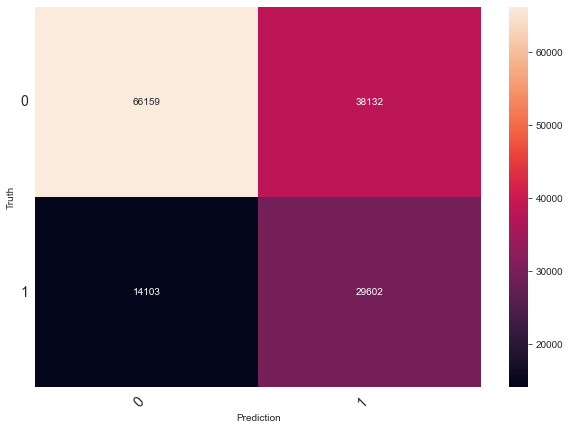

In [34]:
y_pred = rf.predict(X_test)
confusion_matrixs = confusion_matrix(y_test, y_pred)
print_confusion_matrix(confusion_matrixs, ['0', '1'])
print(classification_report(y_test, y_pred))

C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


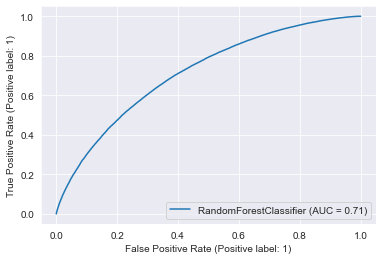

In [35]:
plot_roc_curve(rf,X_test,y_test )

C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


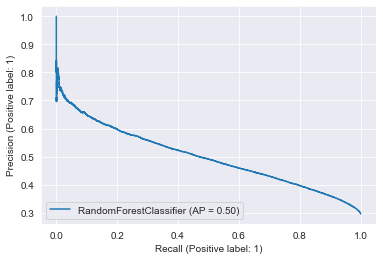

In [36]:
display = PrecisionRecallDisplay.from_estimator(rf, X_test, y_test)